In [35]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

In [36]:
fbs_path = Path('assets','fbs_1961_2013.csv')
fbs = pd.read_csv(fbs_path)
pred_country = "United States of America"
pred_commodity = "Vegetables"

In [37]:
fbs_country_rows = fbs.loc[:,'Country'] == pred_country
fbs_country = fbs.loc[fbs_country_rows,:]
fbs_commodity_rows = fbs_country.loc[:,"Item"] == pred_commodity
fbs_country_commodity = fbs_country.loc[fbs_commodity_rows,:]
fbs_country_commodity_years = fbs_country_commodity.loc[:,'Year'] <= 2013
fbs_country_commodity = fbs_country_commodity.loc[fbs_country_commodity_years,:]

In [38]:
def plotCharts(pred_country, pred_commodity):
    chart_title = pred_country + " - " + pred_commodity
    
    g = sns.lmplot(x='Population', y='Production', data=fbs_country_commodity, ci=None, order=2)
    ax = plt.gca()
    ax.set_title(chart_title)
    
    g = sns.lmplot(x='Population', y='Food', data=fbs_country_commodity, ci=None, order=2)
    ax = plt.gca()
    ax.set_title(chart_title)
    
    g = sns.lmplot(x='Population', y='Export Quantity', data=fbs_country_commodity, ci=None, order=2)
    ax = plt.gca()
    ax.set_title(chart_title)
    
    g = sns.lmplot(x='Population', y='Import Quantity', data=fbs_country_commodity, ci=None, order=2)
    ax = plt.gca()
    ax.set_title(chart_title)
    
    g = sns.lmplot(x='Population', y='Land Use', data=fbs_country_commodity, ci=None, order=2)
    ax = plt.gca()
    ax.set_title(chart_title)
    

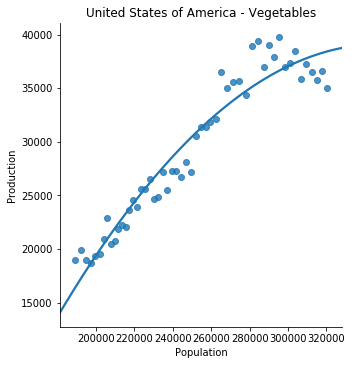

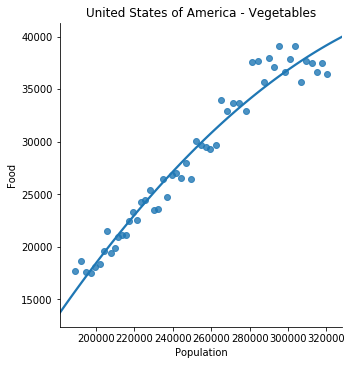

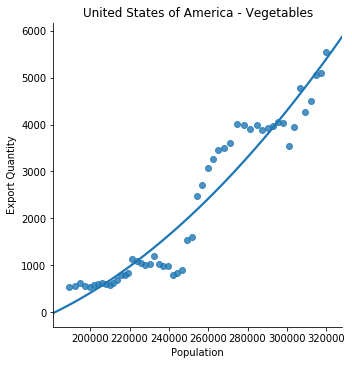

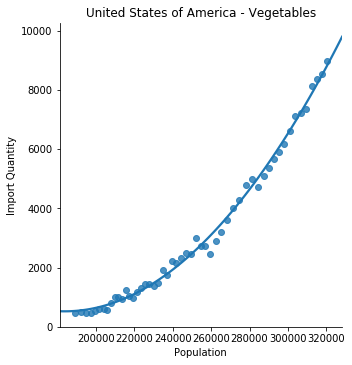

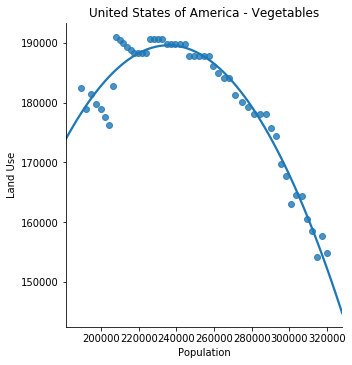

In [39]:
plotCharts("United States of America", "Vegetables")

In [40]:
fbs_country_commodity.drop(['Country Code', 'Item Code'], axis=1).corr()

,Domestic supply quantity,Food,Export Quantity,Import Quantity,Losses,Production,Feed,Stock Variation,Year,Population,Land Use
Domestic supply quantity,1.000000,0.999981,0.933368,0.920034,0.997251,0.992851,0.949934,-0.008161,0.976241,0.974822,-0.646937
Food,0.999981,1.000000,0.931480,0.919312,0.996785,0.992650,0.948269,-0.008375,0.976184,0.974525,-0.644993
Export Quantity,0.933368,0.931480,1.000000,0.939101,0.954649,0.926812,0.950285,0.078360,0.938949,0.952204,-0.763660
Import Quantity,0.920034,0.919312,0.939101,1.000000,0.925278,0.875300,0.914381,0.069902,0.950596,0.969862,-0.852552
Losses,0.997251,0.996785,0.954649,0.925278,1.000000,0.992873,0.964536,-0.003244,0.974495,0.975684,-0.666706
Production,0.992851,0.992650,0.926812,0.875300,0.992873,1.000000,0.943490,-0.027048,0.956156,0.950635,-0.584830
Feed,0.949934,0.948269,0.950285,0.914381,0.964536,0.943490,1.000000,-0.015066,0.923920,0.936645,-0.724247
Stock Variation,-0.008161,-0.008375,0.078360,0.069902,-0.003244,-0.027048,-0.015066,1.000000,0.032478,0.034136,-0.077916
Year,0.976241,0.976184,0.938949,0.950596,0.974495,0.956156,0.923920,0.032478,1.000000,0.996918,-0.675275
Population,0.974822,0.974525,0.952204,0.969862,0.975684,0.950635,0.936645,0.034136,0.996918,1.000000,-0.726293


In [41]:
fbs_country_commodity.tail()

,Country Code,Country,Item Code,Item,Domestic supply quantity,Food,Export Quantity,Import Quantity,Losses,Production,Feed,Stock Variation,Year,Population,Land Use
3106,231,United States of America,2918,Vegetables,40195.0,37686.0,4265.0,7362.0,2316.0,37289.0,195.0,-192.0,2009,309492.0,160560.7
3118,231,United States of America,2918,Vegetables,40015.0,37496.0,4498.0,8137.0,2320.0,36535.0,200.0,-158.0,2010,312247.0,158526.2
3130,231,United States of America,2918,Vegetables,39119.0,36650.0,5057.0,8371.0,2281.0,35762.0,192.0,43.0,2011,314912.0,154269.3
3142,231,United States of America,2918,Vegetables,40010.0,37515.0,5094.0,8525.0,2318.0,36557.0,181.0,22.0,2012,317505.0,157707.5
3154,231,United States of America,2918,Vegetables,38938.0,36472.0,5538.0,8967.0,2278.0,35058.0,193.0,452.0,2013,320051.0,154841.7


In [44]:
# get the MAE of the model that fits the Production value
def get_predicted_loss_mae(pred_country,pred_commodity):
    fbs_country_rows = fbs.loc[:,'Country'] == pred_country
    fbs_country = fbs.loc[fbs_country_rows,:]
    fbs_commodity_rows = fbs_country.loc[:,"Item"] == pred_commodity
    fbs_country_commodity = fbs_country.loc[fbs_commodity_rows,:]
    fbs_country_commodity_years = fbs_country_commodity.loc[:,'Year'] <= 2013
    fbs_country_commodity = fbs_country_commodity.loc[fbs_country_commodity_years,:]
    fbs_country_commodity.loc[:, 'Population Squared'] = fbs_country_commodity.loc[:,'Population']**2

    train_mse_values = []
    test_mse_values = []
    
    feature_cols = ['Population','Population Squared']
    X = fbs_country_commodity.loc[:, feature_cols] #These are our features
    y = fbs_country_commodity.loc[:, 'Losses'] #This is our target
    
    kf= KFold(n_splits=10, shuffle=True)
    
    kf.split(X,y)
        
    for train_indices, test_indices in kf.split(X,y):
        lr = LinearRegression()
    
        X_train = X.iloc[train_indices, :]
        y_train = y.iloc[train_indices]
        X_test = X.iloc[test_indices, :]
        y_test = y.iloc[test_indices]
        
        lr.fit(X_train, y_train)
    
        y_pred_train = lr.predict(X_train)
        y_pred_test = lr.predict(X_test)
            
        train_mse = metrics.mean_absolute_error(y_train, y_pred_train)
        test_mse = metrics.mean_absolute_error(y_test, y_pred_test)
        train_mse_values.append(train_mse)
        test_mse_values.append(test_mse)
    print('Average test for Losses', y_test.mean())
    print('Average test MAE for Losses', sum(test_mse_values)/10)


In [45]:
get_predicted_loss_mae("United States of America","Vegetables")
get_predicted_loss_mae("United States of America","Fruits - Excluding Wine")

Average test for Losses 2149.2
Average test MAE for Losses 78.8518381501981
Average test for Losses 1447.4
Average test MAE for Losses 151.8535661487789


In [46]:
# get the MAE of the model that fits the Production value
def get_predicted_production_mae(pred_country,pred_commodity):
    fbs_country_rows = fbs.loc[:,'Country'] == pred_country
    fbs_country = fbs.loc[fbs_country_rows,:]
    fbs_commodity_rows = fbs_country.loc[:,"Item"] == pred_commodity
    fbs_country_commodity = fbs_country.loc[fbs_commodity_rows,:]
    fbs_country_commodity_years = fbs_country_commodity.loc[:,'Year'] <= 2013
    fbs_country_commodity = fbs_country_commodity.loc[fbs_country_commodity_years,:]
    fbs_country_commodity.loc[:, 'Population Squared'] = fbs_country_commodity.loc[:,'Population']**2
    fbs_country_commodity.loc[:, 'Losses Squared'] = fbs_country_commodity.loc[:,'Losses']**2


    train_mse_values = []
    test_mse_values = []
    
    feature_cols = ['Population','Population Squared','Losses','Losses Squared']
    X = fbs_country_commodity.loc[:, feature_cols] #These are our features
    y = fbs_country_commodity.loc[:, 'Production'] #This is our target
    
    kf= KFold(n_splits=10, shuffle=True)
    
    kf.split(X,y)
        
    for train_indices, test_indices in kf.split(X,y):
        lr = LinearRegression()
    
        X_train = X.iloc[train_indices, :]
        y_train = y.iloc[train_indices]
        X_test = X.iloc[test_indices, :]
        y_test = y.iloc[test_indices]
        
        lr.fit(X_train, y_train)
    
        y_pred_train = lr.predict(X_train)
        y_pred_test = lr.predict(X_test)
            
        train_mse = metrics.mean_absolute_error(y_train, y_pred_train)
        test_mse = metrics.mean_absolute_error(y_test, y_pred_test)
        train_mse_values.append(train_mse)
        test_mse_values.append(test_mse)
    print('Average Production for test set: ',y_test.mean())
    print('Average test MAE for Production', sum(test_mse_values)/10)

In [47]:
get_predicted_production_mae("United States of America","Vegetables")
get_predicted_production_mae("United States of America","Fruits - Excluding Wine")

Average Production for test set:  32311.6
Average test MAE for Production 199.83898170350875
Average Production for test set:  23176.6
Average test MAE for Production 1594.9578952441918


In [48]:
# get the MAE of the model that fits the Food value
def get_predicted_food_mae(pred_country,pred_commodity):
    fbs_country_rows = fbs.loc[:,'Country'] == pred_country
    fbs_country = fbs.loc[fbs_country_rows,:]
    fbs_commodity_rows = fbs_country.loc[:,"Item"] == pred_commodity
    fbs_country_commodity = fbs_country.loc[fbs_commodity_rows,:]
    fbs_country_commodity_years = fbs_country_commodity.loc[:,'Year'] <= 2013
    fbs_country_commodity = fbs_country_commodity.loc[fbs_country_commodity_years,:]
    fbs_country_commodity.loc[:, 'Population Squared'] = fbs_country_commodity.loc[:,'Population']**2
    fbs_country_commodity.loc[:, 'Losses Squared'] = fbs_country_commodity.loc[:,'Losses']**2
    fbs_country_commodity.loc[:, 'Production Squared'] = fbs_country_commodity.loc[:,'Production']**2


    train_mse_values = []
    test_mse_values = []
    
    feature_cols = ['Population','Population Squared','Production','Production Squared','Losses','Losses Squared']
    X = fbs_country_commodity.loc[:, feature_cols] #These are our features
    y = fbs_country_commodity.loc[:, 'Food'] #This is our target
    
    kf= KFold(n_splits=10, shuffle=True)
    
    kf.split(X,y)
        
    for train_indices, test_indices in kf.split(X,y):
        lr = LinearRegression()
    
        X_train = X.iloc[train_indices, :]
        y_train = y.iloc[train_indices]
        X_test = X.iloc[test_indices, :]
        y_test = y.iloc[test_indices]
        
        lr.fit(X_train, y_train)
    
        y_pred_train = lr.predict(X_train)
        y_pred_test = lr.predict(X_test)
            
        train_mse = metrics.mean_absolute_error(y_train, y_pred_train)
        test_mse = metrics.mean_absolute_error(y_test, y_pred_test)
        train_mse_values.append(train_mse)
        test_mse_values.append(test_mse)
    print('Average Food for test set: ', y_test.mean())
    print('Average test MAE for Food', sum(test_mse_values)/10)

In [49]:
get_predicted_food_mae("United States of America","Vegetables")
get_predicted_food_mae("United States of America","Fruits - Excluding Wine")

Average Food for test set:  33347.6
Average test MAE for Food 355.2813845275467
Average Food for test set:  31144.2
Average test MAE for Food 1080.238284532245


In [50]:
# get the MAE of the model that fits the Feed value
def get_predicted_feed_mae(pred_country,pred_commodity):
    fbs_country_rows = fbs.loc[:,'Country'] == pred_country
    fbs_country = fbs.loc[fbs_country_rows,:]
    fbs_commodity_rows = fbs_country.loc[:,"Item"] == pred_commodity
    fbs_country_commodity = fbs_country.loc[fbs_commodity_rows,:]
    fbs_country_commodity_years = fbs_country_commodity.loc[:,'Year'] <= 2013
    fbs_country_commodity = fbs_country_commodity.loc[fbs_country_commodity_years,:]
    fbs_country_commodity.loc[:, 'Population Squared'] = fbs_country_commodity.loc[:,'Population']**2
    fbs_country_commodity.loc[:, 'Losses Squared'] = fbs_country_commodity.loc[:,'Losses']**2
    fbs_country_commodity.loc[:, 'Production Squared'] = fbs_country_commodity.loc[:,'Production']**2
    fbs_country_commodity.loc[:, 'Food Squared'] = fbs_country_commodity.loc[:,'Food']**2


    train_mse_values = []
    test_mse_values = []
    
    feature_cols = ['Food','Food Squared','Population','Population Squared','Production','Production Squared','Losses','Losses Squared']
    X = fbs_country_commodity.loc[:, feature_cols] #These are our features
    y = fbs_country_commodity.loc[:, 'Feed'] #This is our target
    
    kf= KFold(n_splits=10, shuffle=True)
    
    kf.split(X,y)
        
    for train_indices, test_indices in kf.split(X,y):
        lr = LinearRegression()
    
        X_train = X.iloc[train_indices, :]
        y_train = y.iloc[train_indices]
        X_test = X.iloc[test_indices, :]
        y_test = y.iloc[test_indices]
        
        lr.fit(X_train, y_train)
    
        y_pred_train = lr.predict(X_train)
        y_pred_test = lr.predict(X_test)
            
        train_mse = metrics.mean_absolute_error(y_train, y_pred_train)
        test_mse = metrics.mean_absolute_error(y_test, y_pred_test)
        train_mse_values.append(train_mse)
        test_mse_values.append(test_mse)
    print('Average Feed for test set: ', y_test.mean())
    print('Average test MAE for Feed', sum(test_mse_values)/10)


In [51]:
get_predicted_feed_mae("United States of America","Vegetables")
get_predicted_feed_mae("United States of America","Fruits - Excluding Wine")

Average Feed for test set:  131.6
Average test MAE for Feed 4.2976156485925125
Average Feed for test set:  0.0
Average test MAE for Feed 0.0


In [52]:
# get the MAE of the model that fits the Import Quantity value
def get_predicted_import_mae(pred_country,pred_commodity):
    fbs_country_rows = fbs.loc[:,'Country'] == pred_country
    fbs_country = fbs.loc[fbs_country_rows,:]
    fbs_commodity_rows = fbs_country.loc[:,"Item"] == pred_commodity
    fbs_country_commodity = fbs_country.loc[fbs_commodity_rows,:]
    fbs_country_commodity_years = fbs_country_commodity.loc[:,'Year'] <= 2013
    fbs_country_commodity = fbs_country_commodity.loc[fbs_country_commodity_years,:]
    fbs_country_commodity.loc[:, 'Population Squared'] = fbs_country_commodity.loc[:,'Population']**2
    fbs_country_commodity.loc[:, 'Losses Squared'] = fbs_country_commodity.loc[:,'Losses']**2
    fbs_country_commodity.loc[:, 'Production Squared'] = fbs_country_commodity.loc[:,'Production']**2
    fbs_country_commodity.loc[:, 'Food Squared'] = fbs_country_commodity.loc[:,'Food']**2
    fbs_country_commodity.loc[:, 'Feed Squared'] = fbs_country_commodity.loc[:,'Feed']**2


    train_mse_values = []
    test_mse_values = []
    
    feature_cols = ['Food','Food Squared','Population','Population Squared','Production','Production Squared','Feed','Feed Squared','Losses','Losses Squared']
    X = fbs_country_commodity.loc[:, feature_cols] #These are our features
    y = fbs_country_commodity.loc[:, 'Import Quantity'] #This is our target
    
    kf= KFold(n_splits=10, shuffle=True)
    
    kf.split(X,y)
        
    for train_indices, test_indices in kf.split(X,y):
        lr = LinearRegression()
    
        X_train = X.iloc[train_indices, :]
        y_train = y.iloc[train_indices]
        X_test = X.iloc[test_indices, :]
        y_test = y.iloc[test_indices]
        
        lr.fit(X_train, y_train)
    
        y_pred_train = lr.predict(X_train)
        y_pred_test = lr.predict(X_test)
            
        train_mse = metrics.mean_absolute_error(y_train, y_pred_train)
        test_mse = metrics.mean_absolute_error(y_test, y_pred_test)
        train_mse_values.append(train_mse)
        test_mse_values.append(test_mse)
    print('Average Import Quantity for test set: ', y_test.mean())
    print('Average test MAE for Import Quantity', sum(test_mse_values)/10)


In [53]:
get_predicted_import_mae("United States of America","Vegetables")
get_predicted_import_mae("United States of America","Fruits - Excluding Wine")

Average Import Quantity for test set:  3169.6
Average test MAE for Import Quantity 69.44543410859285
Average Import Quantity for test set:  10431.2
Average test MAE for Import Quantity 463.027673804252


In [54]:
# get the MAE of the model that fits the Export Quantity value
def get_predicted_export_mae(pred_country,pred_commodity):
    fbs_country_rows = fbs.loc[:,'Country'] == pred_country
    fbs_country = fbs.loc[fbs_country_rows,:]
    fbs_commodity_rows = fbs_country.loc[:,"Item"] == pred_commodity
    fbs_country_commodity = fbs_country.loc[fbs_commodity_rows,:]
    fbs_country_commodity_years = fbs_country_commodity.loc[:,'Year'] <= 2013
    fbs_country_commodity = fbs_country_commodity.loc[fbs_country_commodity_years,:]
    fbs_country_commodity.loc[:, 'Population Squared'] = fbs_country_commodity.loc[:,'Population']**2
    fbs_country_commodity.loc[:, 'Losses Squared'] = fbs_country_commodity.loc[:,'Losses']**2
    fbs_country_commodity.loc[:, 'Production Squared'] = fbs_country_commodity.loc[:,'Production']**2
    fbs_country_commodity.loc[:, 'Food Squared'] = fbs_country_commodity.loc[:,'Food']**2
    fbs_country_commodity.loc[:, 'Feed Squared'] = fbs_country_commodity.loc[:,'Feed']**2
    fbs_country_commodity.loc[:, 'Import Quantity Squared'] = fbs_country_commodity.loc[:,'Import Quantity']**2
    fbs_country_commodity.loc[:, 'Food*Import'] = fbs_country_commodity.loc[:,'Food'] * fbs_country_commodity.loc[:,'Import Quantity']


    train_mse_values = []
    test_mse_values = []
    
    feature_cols = ['Losses','Losses Squared','Feed','Feed Squared','Import Quantity','Import Quantity Squared','Population','Population Squared','Food*Import']
    X = fbs_country_commodity.loc[:, feature_cols] #These are our features
    y = fbs_country_commodity.loc[:, 'Export Quantity'] #This is our target
    
    kf= KFold(n_splits=10, shuffle=True)
    
    kf.split(X,y)
        
    for train_indices, test_indices in kf.split(X,y):
        lr = LinearRegression()
    
        X_train = X.iloc[train_indices, :]
        y_train = y.iloc[train_indices]
        X_test = X.iloc[test_indices, :]
        y_test = y.iloc[test_indices]
        
        lr.fit(X_train, y_train)
    
        y_pred_train = lr.predict(X_train)
        y_pred_test = lr.predict(X_test)
            
        train_mse = metrics.mean_absolute_error(y_train, y_pred_train)
        test_mse = metrics.mean_absolute_error(y_test, y_pred_test)
        train_mse_values.append(train_mse)
        test_mse_values.append(test_mse)
    print('Average Export Quantity for test set: ', y_test.mean())
    print('Average test MAE for Export Quantity', sum(test_mse_values)/10)


In [55]:
get_predicted_export_mae("United States of America","Vegetables")
get_predicted_export_mae("United States of America","Fruits - Excluding Wine")

Average Export Quantity for test set:  2707.6
Average test MAE for Export Quantity 188.5365700929334
Average Export Quantity for test set:  5146.6
Average test MAE for Export Quantity 523.9243040556933


In [56]:
fbs_country_commodity.tail()

,Country Code,Country,Item Code,Item,Domestic supply quantity,Food,Export Quantity,Import Quantity,Losses,Production,Feed,Stock Variation,Year,Population,Land Use
3106,231,United States of America,2918,Vegetables,40195.0,37686.0,4265.0,7362.0,2316.0,37289.0,195.0,-192.0,2009,309492.0,160560.7
3118,231,United States of America,2918,Vegetables,40015.0,37496.0,4498.0,8137.0,2320.0,36535.0,200.0,-158.0,2010,312247.0,158526.2
3130,231,United States of America,2918,Vegetables,39119.0,36650.0,5057.0,8371.0,2281.0,35762.0,192.0,43.0,2011,314912.0,154269.3
3142,231,United States of America,2918,Vegetables,40010.0,37515.0,5094.0,8525.0,2318.0,36557.0,181.0,22.0,2012,317505.0,157707.5
3154,231,United States of America,2918,Vegetables,38938.0,36472.0,5538.0,8967.0,2278.0,35058.0,193.0,452.0,2013,320051.0,154841.7


In [57]:
fbs_country_commodity.tail()

,Country Code,Country,Item Code,Item,Domestic supply quantity,Food,Export Quantity,Import Quantity,Losses,Production,Feed,Stock Variation,Year,Population,Land Use
3106,231,United States of America,2918,Vegetables,40195.0,37686.0,4265.0,7362.0,2316.0,37289.0,195.0,-192.0,2009,309492.0,160560.7
3118,231,United States of America,2918,Vegetables,40015.0,37496.0,4498.0,8137.0,2320.0,36535.0,200.0,-158.0,2010,312247.0,158526.2
3130,231,United States of America,2918,Vegetables,39119.0,36650.0,5057.0,8371.0,2281.0,35762.0,192.0,43.0,2011,314912.0,154269.3
3142,231,United States of America,2918,Vegetables,40010.0,37515.0,5094.0,8525.0,2318.0,36557.0,181.0,22.0,2012,317505.0,157707.5
3154,231,United States of America,2918,Vegetables,38938.0,36472.0,5538.0,8967.0,2278.0,35058.0,193.0,452.0,2013,320051.0,154841.7


In [59]:
fbs_country_rows = fbs.loc[:,'Country'] == pred_country
fbs_country = fbs.loc[fbs_country_rows,:]
fbs_commodity_rows = fbs_country.loc[:,"Item"] == pred_commodity
fbs_country_commodity = fbs_country.loc[fbs_commodity_rows,:]
fbs_country_commodity_years = fbs_country_commodity.loc[:,'Year'] <= 2013
fbs_country_commodity = fbs_country_commodity.loc[fbs_country_commodity_years,:]

fbs_country_commodity.loc[:, 'Population Squared'] = fbs_country_commodity.loc[:,'Population']**2
fbs_country_commodity.loc[:, 'Losses Squared'] = fbs_country_commodity.loc[:,'Losses']**2
fbs_country_commodity.loc[:, 'Production Squared'] = fbs_country_commodity.loc[:,'Production']**2
fbs_country_commodity.loc[:, 'Food Squared'] = fbs_country_commodity.loc[:,'Food']**2
fbs_country_commodity.loc[:, 'Feed Squared'] = fbs_country_commodity.loc[:,'Feed']**2
fbs_country_commodity.loc[:, 'Import Quantity Squared'] = fbs_country_commodity.loc[:,'Import Quantity']**2
fbs_country_commodity.loc[:, 'Food*Import'] = fbs_country_commodity.loc[:,'Food'] * fbs_country_commodity.loc[:,'Import Quantity']

feature_cols = ['Food','Food Squared','Population','Population Squared','Production','Production Squared','Feed','Feed Squared','Losses','Losses Squared']
X = fbs_country_commodity.loc[:, feature_cols] #These are our features
y = fbs_country_commodity.loc[:, 'Import Quantity'] #This is our target

# max_features=5 is best and n_estimators=150 is sufficiently large.
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=None, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [60]:
rfreg
pd.DataFrame({'feature': feature_cols, 'importance': rfreg.feature_importances_}).sort_values('importance', ascending=False)

,feature,importance
3,Population Squared,0.223366
2,Population,0.222201
8,Losses,0.126165
6,Feed,0.115864
7,Feed Squared,0.098712
9,Losses Squared,0.085169
1,Food Squared,0.049641
0,Food,0.045645
5,Production Squared,0.019201
4,Production,0.014036


In [61]:
rfreg.oob_score_

0.9849891578435884

In [62]:
# Find the average RMSE.
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True)
scores= -cross_val_score(rfreg, X, y, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(scores)
rmse = np.mean(rmse_scores)
rmse

271.90662409013567